In [ ]:
from stardis.opacities.voigt import voigt_profile as voigt_stardis
from astropy.modeling.functional_models import Voigt1D
from scipy.special import voigt_profile as voigt_scipy
import numpy as np
from numba.cuda import is_available as gpu_is_available
import matplotlib.pyplot as plt
if gpu_is_available():
    from stardis.opacities.voigt import voigt_profile_cuda as voigt_stardis_cuda

In [2]:
def call_stardis(x, y, z):
    # x, sigma, gamma
    return voigt_stardis(
        x,
        y / np.sqrt(2),
        z * (4 * np.pi),
    )

if gpu_is_available():
    def call_stardis_cuda(x, y, z):
        # x, sigma, gamma
        return voigt_stardis_cuda(
            x,
            y / np.sqrt(2),
            z * (4 * np.pi),
        ).get()

def call_scipy(x, y, z):
    # x, sigma, gamma
    return voigt_scipy(x, y, z)


def call_astropy(x, y, z):
    # x,
    amp = 1 / np.pi / z
    return Voigt1D(x_0=0, fwhm_L=2 * z, fwhm_G=2.3548 * y, amplitude_L=amp,).evaluate(
        x,
        x_0=0,
        fwhm_L=2 * z,
        fwhm_G=2.3548 * y,
        amplitude_L=amp,
    )


def call_astropy_scipy(x, y, z):
    # x,
    amp = 1 / np.pi / z
    return Voigt1D(
        x_0=0,
        fwhm_L=2 * z,
        fwhm_G=2.3548 * y,
        amplitude_L=amp,
        method="Scipy",
    ).evaluate(
        x,
        x_0=0,
        fwhm_L=2 * z,
        fwhm_G=2.3548 * y,
        amplitude_L=amp,
    )


if gpu_is_available():
    funcs = (call_stardis, call_stardis_cuda, call_scipy, call_astropy, call_astropy_scipy)
else:
    funcs = (call_stardis, call_scipy, call_astropy, call_astropy_scipy)

In [3]:
array_length = 10**2
x_grid = np.array(range(array_length)) - 0.5 * array_length
test_values = (
    x_grid,
    np.array(array_length * [4], dtype=float),
    np.array(array_length * [7], dtype=float),
)

In [4]:
outputs = tuple(f(*test_values) for f in funcs)

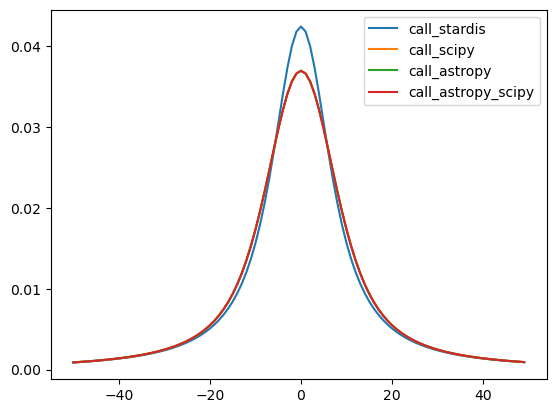

In [5]:
for output, func in zip(outputs, funcs):
    plt.plot(x_grid, output, label=func.__name__)

plt.legend()

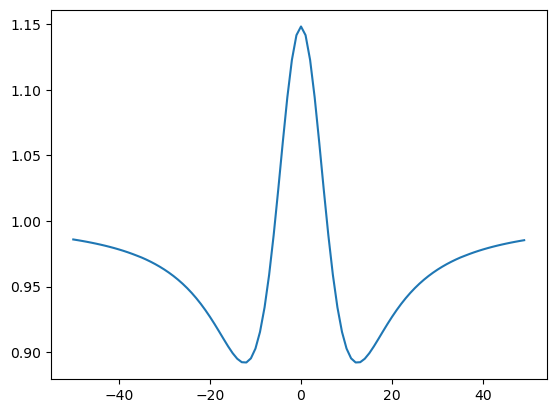

In [6]:
plt.plot(x_grid, outputs[0] / outputs[-1])